In [1]:
# RECOMMENDED INSIGHTS 

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_campaigns = pd.read_csv("dim_campaigns.csv")
df_products = pd.read_csv('dim_products.csv')
df_stores = pd.read_csv("dim_stores.csv")
df_events = pd.read_csv('fact_events.csv')

In [4]:
df_campaigns['start_date'] = pd.to_datetime(df_campaigns['start_date'], dayfirst = True) 
df_campaigns['end_date'] = pd.to_datetime(df_campaigns['end_date'], dayfirst = True) 
df_campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   campaign_id    2 non-null      object        
 1   campaign_name  2 non-null      object        
 2   start_date     2 non-null      datetime64[ns]
 3   end_date       2 non-null      datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 192.0+ bytes


In [5]:
#Store Performance Analysis

In [6]:
# Which are the top 10 stores in terms of incremental revenue (IR) generated from the promotions?

In [7]:
df_events.head()

,event_id,store_id,campaign_id,product_code,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo)
0,7f650b,STCBE-2,CAMP_SAN_01,P11,190,50% OFF,34,52
1,a21f91,STBLR-8,CAMP_DIW_01,P03,156,25% OFF,393,322
2,78bc80,STVJD-0,CAMP_SAN_01,P07,300,BOGOF,22,85
3,a1503f,STCBE-1,CAMP_DIW_01,P15,3000,500 Cashback,329,1000
4,1091cf,STBLR-6,CAMP_DIW_01,P05,55,25% OFF,108,93


In [8]:
#Revenue before and after promo
df_events = df_events
df_events['revenue_bf'] = df_events['base_price'] * df_events['quantity_sold(before_promo)']
df_events['revenue_af'] = df_events['base_price'] * df_events['quantity_sold(after_promo)']
df_events.head()


,event_id,store_id,campaign_id,product_code,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo),revenue_bf,revenue_af
0,7f650b,STCBE-2,CAMP_SAN_01,P11,190,50% OFF,34,52,6460,9880
1,a21f91,STBLR-8,CAMP_DIW_01,P03,156,25% OFF,393,322,61308,50232
2,78bc80,STVJD-0,CAMP_SAN_01,P07,300,BOGOF,22,85,6600,25500
3,a1503f,STCBE-1,CAMP_DIW_01,P15,3000,500 Cashback,329,1000,987000,3000000
4,1091cf,STBLR-6,CAMP_DIW_01,P05,55,25% OFF,108,93,5940,5115


In [9]:
df_events['ISU%'] = (((df_events['quantity_sold(after_promo)'] - df_events['quantity_sold(before_promo)']) / df_events['quantity_sold(before_promo)']) * 100).round(2)
df_events.head()

,event_id,store_id,campaign_id,product_code,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo),revenue_bf,revenue_af,ISU%
0,7f650b,STCBE-2,CAMP_SAN_01,P11,190,50% OFF,34,52,6460,9880,52.94
1,a21f91,STBLR-8,CAMP_DIW_01,P03,156,25% OFF,393,322,61308,50232,-18.07
2,78bc80,STVJD-0,CAMP_SAN_01,P07,300,BOGOF,22,85,6600,25500,286.36
3,a1503f,STCBE-1,CAMP_DIW_01,P15,3000,500 Cashback,329,1000,987000,3000000,203.95
4,1091cf,STBLR-6,CAMP_DIW_01,P05,55,25% OFF,108,93,5940,5115,-13.89


In [10]:
#Deriving the column for IR%
df_events['IR%'] = (((df_events['revenue_af'] - df_events['revenue_bf']) / df_events['revenue_bf']) * 100).round(2)
df_events.head()

,event_id,store_id,campaign_id,product_code,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo),revenue_bf,revenue_af,ISU%,IR%
0,7f650b,STCBE-2,CAMP_SAN_01,P11,190,50% OFF,34,52,6460,9880,52.94,52.94
1,a21f91,STBLR-8,CAMP_DIW_01,P03,156,25% OFF,393,322,61308,50232,-18.07,-18.07
2,78bc80,STVJD-0,CAMP_SAN_01,P07,300,BOGOF,22,85,6600,25500,286.36,286.36
3,a1503f,STCBE-1,CAMP_DIW_01,P15,3000,500 Cashback,329,1000,987000,3000000,203.95,203.95
4,1091cf,STBLR-6,CAMP_DIW_01,P05,55,25% OFF,108,93,5940,5115,-13.89,-13.89


In [11]:
# Which are the top 10 stores in terms of incremental revenue (IR) generated from the promotions?

In [12]:
#Group by dataframe object for store_id category in df_events dataframes
df_events_str_gp = df_events.groupby(['store_id'])
df_events_str_gp 

In [13]:
df_events_str_gp_IR_avg =df_events_str_gp ['IR%'].mean().round(2).sort_values(ascending = False).reset_index()
df_events_str_gp_IR_avg.head()

,store_id,IR%
0,STBLR-7,133.74
1,STCHE-7,132.18
2,STMYS-1,131.91
3,STCBE-2,131.65
4,STBLR-6,130.61


In [14]:
df_insight_1 = pd.merge(df_stores, df_events_str_gp_IR_avg, on = 'store_id' )
df_insight_1 = df_insight_1.sort_values(by = 'IR%', ascending = False, ignore_index = True).iloc[0:10,]
df_insight_1

,store_id,city,IR%
0,STBLR-7,Bengaluru,133.74
1,STCHE-7,Chennai,132.18
2,STMYS-1,Mysuru,131.91
3,STCBE-2,Coimbatore,131.65
4,STBLR-6,Bengaluru,130.61
5,STCHE-4,Chennai,128.80
6,STCHE-3,Chennai,127.63
7,STMDU-0,Madurai,126.44
8,STBLR-0,Bengaluru,125.68
9,STMYS-3,Mysuru,120.42


In [15]:
#Which are the Bottom 10 stores when it comes to Incremental sold units from the promotional period?

In [16]:
df_events_str_gp_ISU_avg =df_events_str_gp ['ISU%'].mean().round(2).reset_index()
df_events_str_gp_ISU_avg.head()

,store_id,ISU%
0,STBLR-0,125.68
1,STBLR-1,78.75
2,STBLR-2,109.97
3,STBLR-3,107.04
4,STBLR-4,110.61


In [17]:
df_insight_2 = pd.merge(df_stores, df_events_str_gp_ISU_avg, on = 'store_id' )
df_insight_2 = df_insight_2.sort_values(by = 'ISU%', ignore_index = True).iloc[0:10,]
df_insight_2

,store_id,city,ISU%
0,STCHE-1,Chennai,67.97
1,STVSK-3,Visakhapatnam,69.07
2,STHYD-1,Hyderabad,69.19
3,STVSK-4,Visakhapatnam,72.06
4,STMLR-0,Mangalore,74.55
5,STMYS-0,Mysuru,74.57
6,STCBE-4,Coimbatore,75.56
7,STMYS-2,Mysuru,75.75
8,STBLR-1,Bengaluru,78.75
9,STHYD-3,Hyderabad,81.54


In [18]:
#How does the performance of stores vary by city? 


In [19]:
#Group by dataframe object for store_id category in df_events dataframes
df_insight_2_city_gp = df_insight_2.groupby(['city'])
df_insight_2_city_gp

<Axes: title={'center': 'ISU% Acros Cities'}, xlabel='City', ylabel='ISU%'>

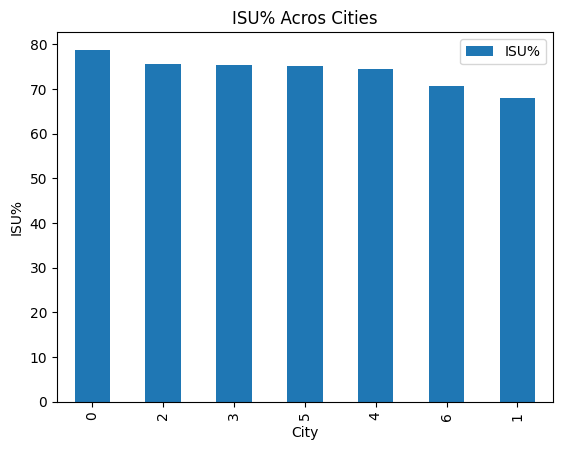

In [20]:
df_insight_2_city_gp_ISU_avg =df_insight_2_city_gp['ISU%'].mean().round(2).reset_index()
df_insight_3 = df_insight_2_city_gp_ISU_avg.sort_values(by = 'ISU%',ascending = False).plot(kind = 'bar', title = 'ISU% Acros Cities', xlabel = 'City', ylabel = 'ISU%')
df_insight_3

In [21]:
#PROMOTION TYPE ANALYSIS

In [22]:
#4. Which are the two promotion types that resulted in the  highest incremental revenue (IR)?

In [23]:
#Group by dataframe object for promotion type category in df_events dataframes
df_events_promo_gp = df_events.groupby(['promo_type'])
df_events_promo_gp 

In [24]:
df_events_promo_gp_IR_avg =df_events_promo_gp ['IR%'].mean().round(2).sort_values(ascending = False).reset_index()
df_report_4 = df_events_promo_gp_IR_avg[0:2]
df_report_4

,promo_type,IR%
0,BOGOF,261.22
1,500 Cashback,162.17


In [25]:
# 5.Which are the bottom two promotion types in terms of their impact on Incremental Sold Units?


In [26]:
df_events_promo_gp_ISU_avg =df_events_promo_gp ['ISU%'].mean().round(2).sort_values().reset_index()
df_report_5 = df_events_promo_gp_ISU_avg[0:2]
df_report_5

,promo_type,ISU%
0,25% OFF,-15.40
1,50% OFF,33.49


In [27]:
#6. Which promotions strike the best balance between Incremental Solid Units and Maintaining healthy Margins? 
# (Assuming a Margin is the difference between Revenue after Promo  -  Revenue before Promo) 


In [28]:
#Deriving the value for Revenue Margin
df_events['revenue_margin'] = (df_events['revenue_af'] - df_events['revenue_bf'])
df_events.head()

,event_id,store_id,campaign_id,product_code,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo),revenue_bf,revenue_af,ISU%,IR%,revenue_margin
0,7f650b,STCBE-2,CAMP_SAN_01,P11,190,50% OFF,34,52,6460,9880,52.94,52.94,3420
1,a21f91,STBLR-8,CAMP_DIW_01,P03,156,25% OFF,393,322,61308,50232,-18.07,-18.07,-11076
2,78bc80,STVJD-0,CAMP_SAN_01,P07,300,BOGOF,22,85,6600,25500,286.36,286.36,18900
3,a1503f,STCBE-1,CAMP_DIW_01,P15,3000,500 Cashback,329,1000,987000,3000000,203.95,203.95,2013000
4,1091cf,STBLR-6,CAMP_DIW_01,P05,55,25% OFF,108,93,5940,5115,-13.89,-13.89,-825


In [29]:
df_events_promo_gp_ISU_marg_avg =df_events_promo_gp [['ISU%','revenue_margin']].mean().round(2).reset_index()
df_events_promo_gp_ISU_marg_avg

,promo_type,ISU%,revenue_margin
0,25% OFF,-15.40,-2937.16
1,33% OFF,43.27,78321.06
2,50% OFF,33.49,2365.41
3,500 Cashback,162.17,1226430.00
4,BOGOF,261.22,138633.98


In [30]:
import matplotlib.pyplot as plt

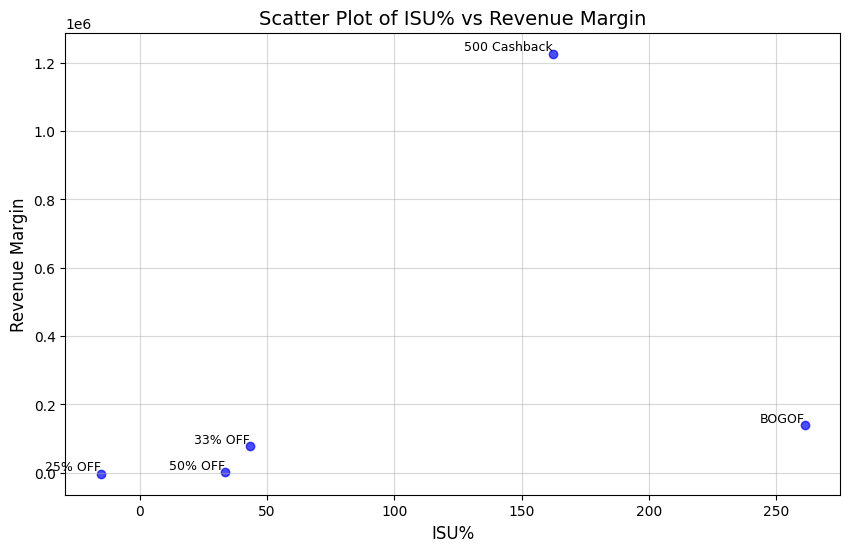

In [31]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_events_promo_gp_ISU_marg_avg["ISU%"], df_events_promo_gp_ISU_marg_avg["revenue_margin"], color="blue", alpha=0.7)

# Adding labels for promo_type
for i, row in df_events_promo_gp_ISU_marg_avg.iterrows():
    plt.text(row["ISU%"], row["revenue_margin"], row["promo_type"], fontsize=9, ha='right', va='bottom')

# Add titles and labels
plt.title("Scatter Plot of ISU% vs Revenue Margin", fontsize=14)
plt.xlabel("ISU%", fontsize=12)
plt.ylabel("Revenue Margin", fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [32]:
# Product and Category Analysis

In [33]:
# 7.Which product categories saw the most significant lift in sales from the promotions?

In [34]:
#Merging df_events table with df_products
df_prod_event_mg = pd.merge(df_products, df_events, on = 'product_code')
df_prod_event_mg.head()

,product_code,product_name,category,event_id,store_id,campaign_id,base_price,promo_type,quantity_sold(before_promo),quantity_sold(after_promo),revenue_bf,revenue_af,ISU%,IR%,revenue_margin
0,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples,c4db5b,STTRV-0,CAMP_DIW_01,172,33% OFF,164,236,28208,40592,43.90,43.90,12384
1,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples,260ff2,STMYS-2,CAMP_SAN_01,172,33% OFF,204,291,35088,50052,42.65,42.65,14964
2,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples,2f3e5d,STCHE-2,CAMP_SAN_01,172,33% OFF,333,402,57276,69144,20.72,20.72,11868
3,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples,df45ee,STHYD-3,CAMP_DIW_01,172,33% OFF,309,534,53148,91848,72.82,72.82,38700
4,P01,Atliq_Masoor_Dal (1KG),Grocery & Staples,c1e0b6,STCHE-6,CAMP_SAN_01,172,33% OFF,273,379,46956,65188,38.83,38.83,18232


In [35]:
#Group by dataframe object for 'category' column in df_prod_event_mg_cat_gp dataframes
df_prod_event_mg_cat_gp= df_prod_event_mg.groupby(['category'])
df_prod_event_mg_cat_gp

In [36]:
df_prod_event_mg_cat_gp_ISU_avg =df_prod_event_mg_cat_gp ['ISU%'].mean().round(2).reset_index()
df_insight_7 = df_prod_event_mg_cat_gp_ISU_avg.sort_values(by = 'ISU%', ascending = False, ignore_index = True)
df_insight_7

,category,ISU%
0,Home Appliances,258.07
1,Combo1,162.17
2,Home Care,121.05
3,Grocery & Staples,87.23
4,Personal Care,20.56


In [37]:
# 8. Are there specific products that respond exceptionally well or poor to promotions?

In [38]:
#Group by dataframe object for 'product_name' column in df_prod_event_mg_cat_gp dataframes
df_prod_event_mg_prodname_gp= df_prod_event_mg.groupby(['product_name'])
df_prod_event_mg_prodname_gp

In [39]:
df_prod_event_mg_prodname_gp_ISU_avg = df_prod_event_mg_prodname_gp['ISU%'].mean().round(2).reset_index()
df_insight_8 = df_prod_event_mg_prodname_gp_ISU_avg.sort_values(by = 'ISU%', ignore_index = True)
df_insight_8.head()

,product_name,ISU%
0,Atliq_Fusion_Container_Set_of_3,-15.68
1,Atliq_Scrub_Sponge_For_Dishwash,-15.65
2,Atliq_Body_Milk_Nourishing_Lotion (120ML),6.49
3,Atliq_Cream_Beauty_Bathing_Soap (125GM),6.54
4,Atliq_Doodh_Kesar_Body_Lotion (200ML),34.51


In [40]:
# What is correlation between product category and promotion type effectiveness?


In [41]:
#Group by dataframe object for 'category' and promotion type column in df_prod_event_mg_cat_gp dataframes
df_prod_event_mg_cat_promo_gp= df_prod_event_mg.groupby(['category','promo_type'])
df_prod_event_mg_cat_promo_gp

In [42]:
df_prod_event_mg_cat_promo_gp_ISU_avg = df_prod_event_mg_cat_promo_gp['ISU%'].mean().round(2).reset_index()
df_insight_9 = df_prod_event_mg_cat_promo_gp_ISU_avg.sort_values(by = ['category','promo_type'])
df_insight_9

,category,promo_type,ISU%
0,Combo1,500 Cashback,162.17
1,Grocery & Staples,25% OFF,-12.06
2,Grocery & Staples,33% OFF,43.27
3,Grocery & Staples,BOGOF,274.46
4,Home Appliances,BOGOF,258.07
5,Home Care,25% OFF,-15.66
6,Home Care,BOGOF,257.76
7,Personal Care,25% OFF,-18.22
8,Personal Care,50% OFF,33.49
